# VIDA ARTIFICIAL - Lab 1. Simulando Movimiento

* Santiago Niño
* Esteban Rodriguez
* Daniel Velásquez

Simulando movimiento a través de vectores.

El siguiente ejercicio tiene como objetivo presentar algunos conceptos básicos que permitir la simulación de movimiento. Para esto usted deberá:

    Generar una clase llamada "Vector" que tenga como atributos las coordenadas x, y.
    Generar 3 métodos en la clase. Uno para suma de vectores, uno para calcular la magnitud y otro que represente la multiplicación por un escalar.
    Genere una clase llamada "Bola". La clase debe tener como atributos 2 objetos de la clase "Vector" llamados ubicación y velocidad.
    Genere un método llamado movimiento. Este debe modificar el vector de ubicación sumando el vector de velocidad

Utilizando las clases generadas en el punto anterior, construya las siguientes animaciones:

    Animación 1. Una bola que se mueva en línea recta en un plano. Cuando la bola toque uno de los bordes. Debe “Rebotar” en la dirección opuesta.
    Animación 2. Genere una animación similar a la anterior, pero ahora el comportamiento de la bola al tocar el borde debe ser toroidal.
    Animación 3. Genere una animación similar a la primera, pero que contenga 3 bolas de forma simultánea.

Para tener en cuenta:

    La ubicación inicial de las bolas, la magnitud y dirección de los vectores de velocidad y los límites del plano son de su elección.
    La solución debe ser entregada en un notebook.

# Desarrollo

Generar una clase llamada "Vector" que tenga como atributos las coordenadas x, y.

Generar 3 métodos en la clase. Uno para suma de vectores, uno para calcular la magnitud y otro que represente la multiplicación por un escalar.

In [ ]:
class vector:
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def suma(self, vector):
    return ((self.x + vector.x), (self.y + vector.y))

  def magnitud(self):
    return ((self.x ** 2) + (self.y ** 2)) ** 0.5

  def multiplicacion(self, escalar):
    return ((self.x * escalar), (self.y * escalar))


In [ ]:
v1 = vector(1,2)
v2 = vector(3,4)

In [ ]:
v1.suma(v2)

(4, 6)

In [ ]:
v1.magnitud()

2.23606797749979

In [ ]:
v1.multiplicacion(71)

(71, 142)

In [ ]:
v2.multiplicacion(71)

(213, 284)

Genere una clase llamada "Bola". La clase debe tener como atributos 2 objetos de la clase "Vector" llamados ubicación y velocidad.

Genere un método llamado movimiento. Este debe modificar el vector de ubicación sumando el vector de velocidad

In [ ]:
class bola:
  def __init__(self, ubicacion, velocidad):
    self.ubicacion = ubicacion
    self.velocidad = velocidad

  def movimiento(self):
    return (self.ubicacion.suma(self.velocidad))

In [ ]:
ubicacion = vector(1,7)
velocidad = vector(2,2)

In [ ]:
movimiento = bola(ubicacion, velocidad).movimiento()
movimiento

(3, 9)

In [ ]:
#def obtener_trayectoria(vector1, vector2):
#    puntos = []

    # Calcular la diferencia entre las coordenadas x e y
#    dx = vector2.x - vector1.x
#    dy = vector2.y - vector1.y

    # Calcular el número total de pasos necesarios para llegar desde (x1, y1) a (x2, y2)
#    num_pasos = max(abs(dx), abs(dy))

    # Calcular el tamaño de cada paso en x e y
#    paso_x = dx / num_pasos
#    paso_y = dy / num_pasos

    # Calcular los puntos intermedios entre (x1, y1) y (x2, y2)
#    for i in range(num_pasos + 1):
#        x_intermedio = vector1.x + i * paso_x
#        y_intermedio = vector1.y + i * paso_y
#        puntos.append((x_intermedio, y_intermedio))

#    return puntos

#trayectoria = obtener_trayectoria(vector(1,1), vector(2,13))
#print(trayectoria)


# Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animación 1

Una bola que se mueva en línea recta en un plano. Cuando la bola toque uno de los bordes. Debe “Rebotar” en la dirección opuesta.

Función de limites de bordes

In [ ]:
#Este hace con rebote como en el mundo real
def limites(puntoFinal, velocidad):
    velocidadAux = vector(velocidad.x, velocidad.y)
    if puntoFinal.x < 0:
        velocidadAux.x = velocidad.x * -1
    elif puntoFinal.x > 20:
        velocidadAux.x = velocidad.x * -1
    if puntoFinal.y < 0:
        velocidadAux.y = velocidad.y * -1
    elif puntoFinal.y > 20:
        velocidadAux.y = velocidad.y * -1
    return (velocidadAux.x, velocidadAux.y)

In [ ]:
#def limites(puntoFinal, velocidad):
#    velocidadAux = vector(velocidad.x, velocidad.y)
#    if puntoFinal.x < 0 or puntoFinal.x > limite:
#        velocidadAux.x = velocidad.x * -1
#        velocidadAux.y = velocidad.y * -`
#    elif puntoFinal.y < 0 or puntoFinal.y > limite:
#        velocidadAux.x = velocidad.x * -1
#        velocidadAux.y = velocidad.y * -1
#    return (velocidadAux.x, velocidadAux.y)

Desarrollo

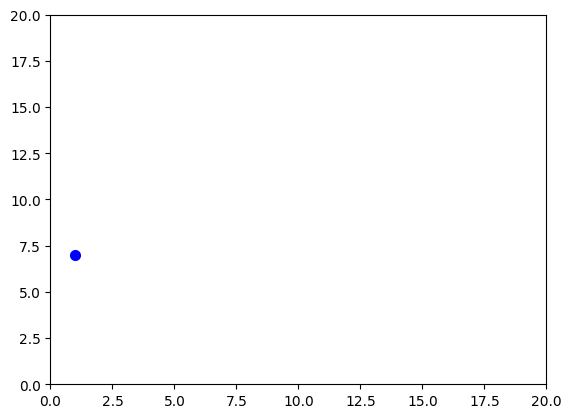

In [ ]:
limite = 20

fig, axes = plt.subplots()

axes.set_xlim(0, limite)  # Limitamos el eje X de 0 a 20
axes.set_ylim(0, limite)  # Limitamos el eje y de 0 a 20

#Grafica la ubicacion inicial
canvas = axes.scatter(ubicacion.x, ubicacion.y, color='blue', linewidth=2)

In [ ]:
ubiInicial = ubicacion
rangoMov = []
rangoMov.append((ubiInicial.x, ubiInicial.y))
for i in range(100):
    ubiFinal = bola(ubiInicial, velocidad).movimiento()
    limitesMov = limites(vector(ubiFinal[0], ubiFinal[1]), velocidad)
    if limitesMov[0] != velocidad.x or limitesMov[1] != velocidad.y:
        velocidad.x = limitesMov[0]
        velocidad.y = limitesMov[1]
        ubiFinal = bola(ubiInicial, velocidad).movimiento()
    rangoMov.append(ubiFinal)
    ubiInicial = vector(ubiFinal[0], ubiFinal[1])

rangoMov

[(1, 7),
 (3, 9),
 (5, 11),
 (7, 13),
 (9, 15),
 (11, 17),
 (13, 19),
 (15, 17),
 (17, 15),
 (19, 13),
 (17, 11),
 (15, 9),
 (13, 7),
 (11, 5),
 (9, 3),
 (7, 1),
 (5, 3),
 (3, 5),
 (1, 7),
 (3, 9),
 (5, 11),
 (7, 13),
 (9, 15),
 (11, 17),
 (13, 19),
 (15, 17),
 (17, 15),
 (19, 13),
 (17, 11),
 (15, 9),
 (13, 7),
 (11, 5),
 (9, 3),
 (7, 1),
 (5, 3),
 (3, 5),
 (1, 7),
 (3, 9),
 (5, 11),
 (7, 13),
 (9, 15),
 (11, 17),
 (13, 19),
 (15, 17),
 (17, 15),
 (19, 13),
 (17, 11),
 (15, 9),
 (13, 7),
 (11, 5),
 (9, 3),
 (7, 1),
 (5, 3),
 (3, 5),
 (1, 7),
 (3, 9),
 (5, 11),
 (7, 13),
 (9, 15),
 (11, 17),
 (13, 19),
 (15, 17),
 (17, 15),
 (19, 13),
 (17, 11),
 (15, 9),
 (13, 7),
 (11, 5),
 (9, 3),
 (7, 1),
 (5, 3),
 (3, 5),
 (1, 7),
 (3, 9),
 (5, 11),
 (7, 13),
 (9, 15),
 (11, 17),
 (13, 19),
 (15, 17),
 (17, 15),
 (19, 13),
 (17, 11),
 (15, 9),
 (13, 7),
 (11, 5),
 (9, 3),
 (7, 1),
 (5, 3),
 (3, 5),
 (1, 7),
 (3, 9),
 (5, 11),
 (7, 13),
 (9, 15),
 (11, 17),
 (13, 19),
 (15, 17),
 (17, 15),
 (19, 13

In [ ]:
plt.rc('animation', html='jshtml')

#frames = cantidad de imagenes para la animacion
#canvas = figura que vamos a pintar (imagen)
def update(frame, canvas, x):
  canvas.set_offsets((x[frame][0], x[frame][1]))
  return canvas

#interval = velocidad de movimiento
ani = FuncAnimation(fig=fig, func=update, fargs=(canvas, rangoMov), frames = len(rangoMov), interval=80)

In [ ]:
ani

# Animación 2

Genere una animación similar a la anterior, pero ahora el comportamiento de la bola al tocar el borde debe ser toroidal.


Un comportamiento toroidal, en el contexto de la animación y movimiento de la bola, significa que cuando la bola alcanza los bordes del espacio, en lugar de detenerse o desaparecer, reaparecerá en el lado opuesto del espacio, como si el espacio estuviera curvado en sí mismo en una forma de toroide.

Para visualizar esto, imaginemos el espacio en el que se mueve la bola como una superficie cilíndrica que está conectada de manera circular en ambos extremos. Si la bola cruza uno de los bordes, en lugar de salir del espacio o rebotar en el borde, aparecerá en el lado opuesto como si hubiera dado la vuelta a la superficie cilíndrica.

In [ ]:
#Establecer los datos para ubicación y velocidad
ubicacion = vector(15,10)
velocidad = vector(2,2)

In [ ]:
# El movimiento de la bola sera la suma entre el vector de velocidad y el vector de ubicación

movimiento = bola(ubicacion, velocidad).movimiento()
movimiento

(17, 12)

In [ ]:
def limites(puntoFinal, velocidad, ancho, alto):
    if puntoFinal.x < 0 or puntoFinal.y < 0:
        while puntoFinal.x < limite and puntoFinal.y < limite:
            puntoFinal.x += velocidad.x
            puntoFinal.y += velocidad.y
    elif puntoFinal.x > ancho:
        while puntoFinal.x > 0 and puntoFinal.y > 0:
            puntoFinal.x -= velocidad.x
            puntoFinal.y -= velocidad.y
    return puntoFinal

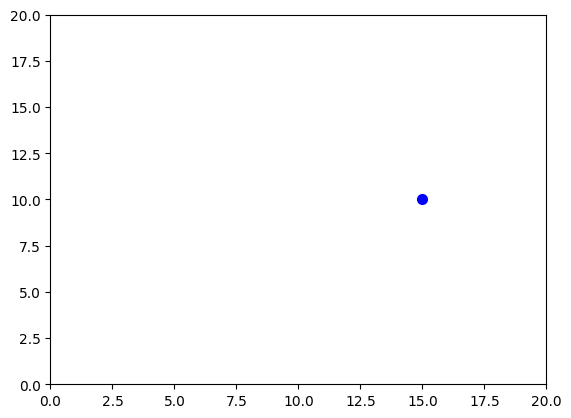

In [ ]:
plt.rc('animation', html='jshtml')

# Definir el ancho y alto del espacio toroidal
ancho = 20
alto = 20

#Establecer los límites de la animación
fig, axes = plt.subplots()
axes.set_xlim(0, ancho)
axes.set_ylim(0, alto)

#Grafica la ubicacion inicial
canvas = axes.scatter(ubicacion.x, ubicacion.y, color='blue', linewidth=2)

In [ ]:
# Crear una lista 'rangoMov' para guardar las posiciones (coordenadas) de la bola
ubiInicial = ubicacion
rangoMov = []
rangoMov.append((ubiInicial.x, ubiInicial.y))

for i in range(100):
    # Calcular la nueva posición de la bola mediante la función de movimiento
    ubiFinal = bola(ubiInicial, velocidad).movimiento()
    # Aplicar un coomportamiento toroidal a la bola
    limitesMov = limites(vector(ubiFinal[0], ubiFinal[1]), velocidad, ancho, alto)

    if limitesMov.x != ubiFinal[0] or limitesMov.y != ubiFinal[1]:
        ubiFinal = (limitesMov.x, limitesMov.y)
        #ubiFinal = bola(ubiInicial, velocidad).movimiento()
    rangoMov.append(ubiFinal)
    ubiInicial = vector(ubiFinal[0], ubiFinal[1])
rangoMov

[(15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0),
 (7, 2),
 (9, 4),
 (11, 6),
 (13, 8),
 (15, 10),
 (17, 12),
 (19, 14),
 (5, 0)

In [ ]:
plt.rc('animation', html='jshtml')

#frames = cantidad de imagenes para la animacion
#canvas = figura que vamos a pintar (imagen)
def update(frame, canvas, x):
  canvas.set_offsets((x[frame][0], x[frame][1]))
  return canvas

#interval = velocidad de movimiento
ani = FuncAnimation(fig=fig, func=update, fargs=(canvas, rangoMov), frames = len(rangoMov), interval=40)

In [ ]:
ani

# Animación 3

Genere una animación similar a la primera, pero que contenga 3 bolas de forma simultánea.

In [ ]:
def limites(puntoFinal, velocidad):
    velocidadAux = vector(velocidad.x, velocidad.y)
    if puntoFinal.x < 0 or puntoFinal.x > limite:
        velocidadAux.x = velocidad.x * -1
        velocidadAux.y = velocidad.y * -1
    elif puntoFinal.y < 0 or puntoFinal.y > limite:
        velocidadAux.x = velocidad.x * -1
        velocidadAux.y = velocidad.y * -1
    return (velocidadAux.x, velocidadAux.y)

In [ ]:
ubicacion1 = vector(5, 5)
velocidad1 = vector(1, 1)
movimiento1 = bola(ubicacion1, velocidad1).movimiento()

ubicacion2 = vector(15, 2)
velocidad2 = vector(1, -1)
movimiento2 = bola(ubicacion2, velocidad2).movimiento()

ubicacion3 = vector(1, 7)
velocidad3 = vector(1, 0)
movimiento3 = bola(ubicacion3, velocidad3).movimiento()

In [ ]:
plt.rc('animation', html='jshtml')

# Definir el ancho y alto del espacio toroidal
ancho = 20
alto = 20

# Establecer los límites de la animación
fig, axes = plt.subplots()
axes.set_xlim(0, ancho)
axes.set_ylim(0, alto)

# Graficar la ubicacion inicial
canvas = axes.scatter((ubicacion1.x, ubicacion2.x, ubicacion3.x), (ubicacion1.y, ubicacion2.y, ubicacion3.y), color='blue', linewidth=2)

In [ ]:
ubiInicial = ubicacion1
rangoMov1 = []
rangoMov1.append((ubiInicial.x, ubiInicial.y))
for i in range(100):
    ubiFinal = bola(ubiInicial, velocidad1).movimiento()
    limitesMov = limites(vector(ubiFinal[0], ubiFinal[1]), velocidad1)
    if limitesMov[0] != velocidad1.x or limitesMov[1] != velocidad1.y:
        velocidad1.x = limitesMov[0]
        velocidad1.y = limitesMov[1]
        ubiFinal = bola(ubiInicial, velocidad1).movimiento()
    rangoMov1.append(ubiFinal)
    ubiInicial = vector(ubiFinal[0], ubiFinal[1])

rangoMov1

In [ ]:
ubiInicial = ubicacion2
rangoMov2 = []
rangoMov2.append((ubiInicial.x, ubiInicial.y))
for i in range(100):
    ubiFinal = bola(ubiInicial, velocidad2).movimiento()
    limitesMov = limites(vector(ubiFinal[0], ubiFinal[1]), velocidad2)
    if limitesMov[0] != velocidad2.x or limitesMov[1] != velocidad2.y:
        velocidad2.x = limitesMov[0]
        velocidad2.y = limitesMov[1]
        ubiFinal = bola(ubiInicial, velocidad2).movimiento()
    rangoMov2.append(ubiFinal)
    ubiInicial = vector(ubiFinal[0], ubiFinal[1])

rangoMov2

In [ ]:
ubiInicial = ubicacion3
rangoMov3 = []
rangoMov3.append((ubiInicial.x, ubiInicial.y))
for i in range(100):
    ubiFinal = bola(ubiInicial, velocidad3).movimiento()
    limitesMov = limites(vector(ubiFinal[0], ubiFinal[1]), velocidad3)
    if limitesMov[0] != velocidad3.x or limitesMov[1] != velocidad3.y:
        velocidad3.x = limitesMov[0]
        velocidad3.y = limitesMov[1]
        ubiFinal = bola(ubiInicial, velocidad3).movimiento()
    rangoMov3.append(ubiFinal)
    ubiInicial = vector(ubiFinal[0], ubiFinal[1])

rangoMov3

In [ ]:
plt.rc('animation', html='jshtml')

#frames = cantidad de imagenes para la animacion
#canvas = figura que vamos a pintar (imagen)
def update(frame, canvas, rM1, rM2, rM3):
  canvas.set_offsets([(rM1[frame][0], rM1[frame][1]), (rM2[frame][0], rM2[frame][1]), (rM3[frame][0], rM3[frame][1])])
  return canvas

#interval = velocidad de movimiento
ani = FuncAnimation(fig=fig, func=update, fargs=(canvas, rangoMov1, rangoMov2, rangoMov3), frames = len(rangoMov), interval=80)

In [ ]:
ani

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f1ab6b8e-8b27-4f22-a4b8-546b112928b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>